In [77]:
import pandas as pd

In [78]:
data=pd.read_csv('train.csv')

In [79]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
Open_Date = LabelEncoder()
data['Open Date'] = Open_Date.fit_transform(data['Open Date'])

City = LabelEncoder()
data['City'] = City.fit_transform(data['City'])

City_Group = LabelEncoder()
data['City Group'] =City_Group.fit_transform(data['City Group'])

Type = LabelEncoder()
data['Type'] = Type.fit_transform(data['Type'])

data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,59,31,0,2,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,16,3,0,1,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,20,10,1,2,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,10,28,1,2,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,41,14,1,2,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [82]:
x=data.drop(['Id','Open Date','revenue'],axis=1)
y=data['revenue']

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [85]:
from sklearn.ensemble import RandomForestRegressor
rtree=RandomForestRegressor()
rtree.fit(x_train,y_train)

C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [86]:
imp=pd.DataFrame()
imp['col']=x.columns
imp['imp']=rtree.feature_importances_*100
imp.sort_values('imp',ascending=False)

,col,imp
31,P29,30.943261
0,City,11.327752
15,P13,5.245429
30,P28,5.227575
25,P23,5.082605
19,P17,3.520618
22,P20,3.472870
4,P2,3.279111
34,P32,3.097081
16,P14,2.587657


In [87]:
x.columns

Index(['City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37'],
      dtype='object')

In [88]:
x=x.drop(['P32','P24','P35','P10','P13','P16','City Group','P18','P37','P25','P31','P15','P36','P27','P30','P33','P34','Type','P14'],axis=1)

In [89]:
x.head()

,City,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P12,P17,P19,P20,P21,P22,P23,P26,P28,P29
0,31,4,5.0,4.0,4.0,2,2,5,4,5,...,5,2,5,4,1,3,3,1.0,2.0,3.0
1,3,4,5.0,4.0,4.0,1,2,5,5,5,...,5,0,3,2,1,3,2,0.0,3.0,3.0
2,10,2,4.0,2.0,5.0,2,3,5,5,5,...,5,0,1,1,1,1,1,0.0,1.0,3.0
3,28,6,4.5,6.0,6.0,4,4,10,8,10,...,10,3,20,12,6,1,10,2.5,2.5,7.5
4,14,3,4.0,3.0,4.0,2,2,5,5,5,...,5,1,2,2,1,2,1,3.0,1.0,3.0


In [90]:
from sklearn.neural_network import MLPRegressor

In [91]:
ann_model=MLPRegressor()

In [92]:
ann_model.fit(x_train,y_train)

C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [93]:
y_test_pred=ann_model.predict(x_test)
y_test_pred

array([1852.56104476,  393.38073468,  550.85115272,  512.21092909,
       1892.42494786,  377.56961071,  787.81454351,  432.73729888,
        380.56933467,  803.73995914, 1503.01781719,  551.06703823,
        424.81221199,  731.99684273,  854.95966633,  553.9406348 ,
        499.57462755,  284.30714044,  486.92601038,  428.73032939,
        683.59029465,  496.99303316,  539.24218966,  517.81339656,
        444.05721263,  574.77460597,  646.84108735,  783.31375346,
        414.51674558,  455.10544804,  810.09697175,  475.68838919,
        872.71594517,  384.08557815,  734.08679629,  376.65866445,
        389.12728262,  504.98105323,  467.94292658,  492.45759375,
        360.25799693, 2012.96944083])

In [94]:
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

5562770.08369434


In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid={"hidden_layer_sizes":[(100,55),(99,66,55),(40,80,60,100),(100,40,50,20,70)],
           "max_iter":[300,400],
           "activation":['relu','logistic','tanh','identity']
           }

In [97]:
optimized_tree=GridSearchCV(ann_model,param_grid,scoring='neg_mean_absolute_error',verbose=2,cv=8)

In [98]:
optimized_tree.fit(x_train,y_train)

Fitting 8 folds for each of 32 candidates, totalling 256 fits
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=300 .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.8s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.9s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.9s
[CV] activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.8s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   1.1s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.9s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   1.4s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.8s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.8s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.8s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.8s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.9s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   1.2s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.9s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   1.1s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.9s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   1.0s
[CV] activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.9s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.9s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.9s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   1.1s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.8s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400 .....


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.8s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400 ..


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.7s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.7s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.7s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.7s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   1.1s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   1.0s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.7s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.7s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.7s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.6s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.8s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.9s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.2s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.2s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.2s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.2s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.2s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=300 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=300, total=   0.2s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.5s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(100, 55), max_iter=400 .


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 55), max_iter=400, total=   0.5s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=300, total=   0.5s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.5s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.8s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.5s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.5s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(99, 66, 55), max_iter=400, total=   0.5s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.5s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.5s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.5s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=300, total=   0.5s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   1.4s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.8s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.7s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(40, 80, 60, 100), max_iter=400, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=300, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.5s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.9s
[CV] activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400 


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 256 out of 256 | elapsed:  3.0min finished


[CV]  activation=identity, hidden_layer_sizes=(100, 40, 50, 20, 70), max_iter=400, total=   0.8s


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=8, error_score='raise-deprecating',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [(100, 55), (99, 66, 55), (40, 80, 60, 100), (100, 40, 50, 20, 70)], 'max_iter': [300, 400], 'activation': ['relu', 'logistic', 'tanh', 'identity']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=2)

In [99]:
optimized_tree.best_params_

{'activation': 'identity',
 'hidden_layer_sizes': (40, 80, 60, 100),
 'max_iter': 400}

In [100]:
optimized_tree.best_score_

-1654639.2516983745

In [101]:
final_model=optimized_tree.best_estimator_

In [102]:
y_predict=final_model.predict(x_test)
y_predict

array([5094655.54208663, 3186759.27540942, 1635001.57611741,
       4898595.28751084, 5763979.53659138, 3144910.54894973,
       4473590.7853955 , 3656337.822357  , 3011428.13711654,
       4248910.20978472, 3361349.70975548, 5158183.06478551,
       4286035.95318084, 3107980.575079  , 4332196.78256847,
       5100207.38989409, 4149503.50972117, 2395042.81149014,
       4629712.56513177, 3289018.48508641, 4652393.81638809,
       4822485.5149134 , 5049708.19678792, 4876223.5770955 ,
       4143481.71744779, 2666447.41923946, 2399065.38611825,
       5164552.41794155, 3603756.15535544, 3519056.27776823,
       4360693.22556744, 4520180.62974876, 6748600.07153217,
       3251674.96174298, 4548092.90335319, 3117808.52814894,
       3149257.46966791, 4813207.78828272, 4462066.03059962,
       4807511.88545513, 2831127.81304263, 5615885.69767545])

In [103]:
print((metrics.mean_squared_error(y_test,y_test_pred)))
print((metrics.mean_absolute_error(y_test,y_test_pred)))

30944411004044.73
4730033.48789807


In [104]:
final_model.fit(x_train,y_train)
y_predict=final_model.predict(x_test)
print(metrics.mean_squared_error(y_test,y_predict))
print(metrics.mean_absolute_error(y_test,y_predict))

8888256852514.277
1771038.0739146993


C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [105]:
import numpy as np
k=79
model=[]
perf=[]
for i in range(k):
    model.append(final_model.fit(x_train,y_train))
    y_pred=final_model.predict(x_test)
    perf.append(metrics.mean_absolute_error(y_test,y_pred))
perf=np.array(perf)
print(perf)
print("avg performance : ",perf.mean())
print("model variance : ",perf.std())

C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, 

C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, 

C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, 

[1760028.95495185 1769181.88145567 1760534.99931577 1775862.41070562
 1773437.2746696  1765021.8874151  1766460.22186955 1776870.12161423
 1769518.69866182 1765302.87401817 1773001.22257595 1775861.98822798
 1770518.61431673 1768764.12740536 1764060.13780689 1761371.52431329
 1763165.36401801 1772643.67371092 1768312.51920381 1775866.60076316
 1768602.17081039 1770577.15461394 1776646.22311647 1772852.245117
 1772014.75503652 1755820.66142454 1780158.53333201 1779420.86464612
 1766319.22250876 1759492.19619056 1765673.70682741 1770045.34700515
 1785374.65164049 1771857.06837861 1773977.40504603 1762951.08502143
 1771106.67224962 1782433.93274656 1777018.01406634 1774004.96979709
 1758102.75247449 1773545.65427017 1772858.56794906 1767549.89511409
 1777718.81802194 1763644.86788924 1773020.80769414 1773427.29726359
 1774975.53590369 1779212.4905952  1770702.52462795 1770002.31129061
 1783145.75739048 1767499.71611073 1775603.42698846 1760303.89687222
 1765021.16993666 1772652.63906874 1

C:\Users\Apporva\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [106]:
avg_perf=np.zeros_like(perf,dtype=float)
avg_perf.fill(perf.mean())
print(avg_perf)

[1770506.58540327 1770506.58540327 1770506.58540327 1770506.58540327
 1770506.58540327 1770506.58540327 1770506.58540327 1770506.58540327
 1770506.58540327 1770506.58540327 1770506.58540327 1770506.58540327
 1770506.58540327 1770506.58540327 1770506.58540327 1770506.58540327
 1770506.58540327 1770506.58540327 1770506.58540327 1770506.58540327
 1770506.58540327 1770506.58540327 1770506.58540327 1770506.58540327
 1770506.58540327 1770506.58540327 1770506.58540327 1770506.58540327
 1770506.58540327 1770506.58540327 1770506.58540327 1770506.58540327
 1770506.58540327 1770506.58540327 1770506.58540327 1770506.58540327
 1770506.58540327 1770506.58540327 1770506.58540327 1770506.58540327
 1770506.58540327 1770506.58540327 1770506.58540327 1770506.58540327
 1770506.58540327 1770506.58540327 1770506.58540327 1770506.58540327
 1770506.58540327 1770506.58540327 1770506.58540327 1770506.58540327
 1770506.58540327 1770506.58540327 1770506.58540327 1770506.58540327
 1770506.58540327 1770506.58540327

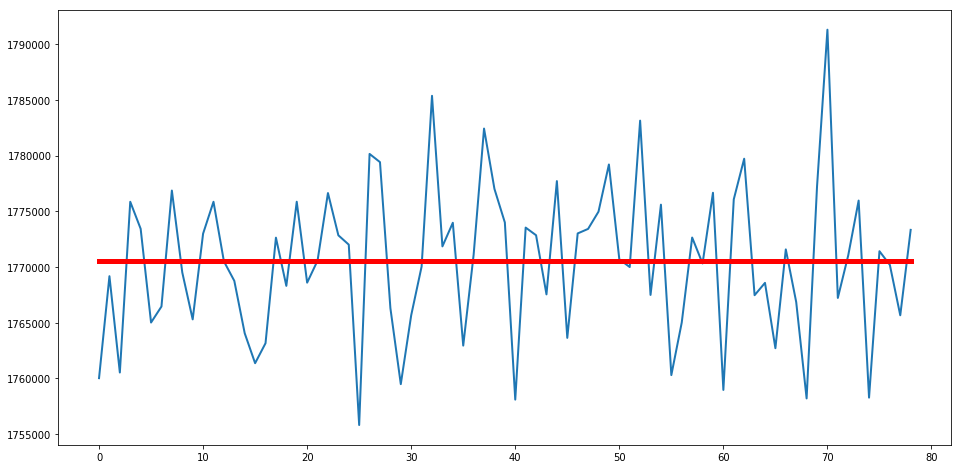

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=(16,8) 
plt.plot(perf,linewidth=2)
plt.plot(avg_perf,'r',linewidth=5)

In [ ]:
import pickle
pickle.dump(final_model,open('practice_ANN(Restuarant).pk','wb'))